<a href="https://colab.research.google.com/github/dewifatimahazzahra/Data_Mining_Dewi_0110223142/blob/main/Dewi_Fatimah_A__0110223142_DM_praktikum9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Membaca file CSV dari Google Drive, melewati baris yang bermasalah
df1 = pd.read_csv("gdrive/My Drive/ColabDataMining/klasifikasi/kelulusan_test.csv", on_bad_lines='skip', encoding='latin-1')
df2 = pd.read_csv("gdrive/My Drive/ColabDataMining/klasifikasi/kelulusan_train.csv", on_bad_lines='skip', encoding='latin-1')
df1    #Menampilkan DataFrame yang telah diimpor
#df2    #Menampilkan DataFrame yang telah diimpor


Mounted at /content/gdrive


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


In [2]:
df1.info()
#df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [3]:
df1.isnull().sum()
#df2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


# **Preprocessing**

In [4]:
mean_emp_length = df1['IPS 8'].mean()# Kalkulasi
mean_emp_length = df1['IPK '].mean()# Kalkulasi
df1['IPS 8'].fillna(mean_emp_length, inplace=True)# Pengisian Missing Value
df1['IPK '].fillna(mean_emp_length, inplace=True)# Pengisian Missing Value

mean_emp_length = df2['IPS 8'].mean()# Kalkulasi
mean_emp_length = df2['IPK '].mean()# Kalkulasi
df2['IPS 8'].fillna(mean_emp_length, inplace=True)# Pengisian Missing Value
df2['IPK '].fillna(mean_emp_length, inplace=True)# Pengisian Missing Value


<ipython-input-4-d54a6b534f8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['IPS 8'].fillna(mean_emp_length, inplace=True)#fill missing value
<ipython-input-4-d54a6b534f8c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [5]:
# Ganti nilai menjadi numerik
df2['JENIS KELAMIN'] = df2['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})
df1['JENIS KELAMIN'] = df1['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})

df2['STATUS MAHASISWA'] = df2['STATUS MAHASISWA'].replace({'MAHASISWA': 0, 'BEKERJA': 1})
df1['STATUS MAHASISWA'] = df1['STATUS MAHASISWA'].replace({'MAHASISWA': 0, 'BEKERJA': 1})

df2['STATUS NIKAH'] = df2['STATUS NIKAH'].replace({'BELUM MENIKAH': 0, 'MENIKAH': 1})
df1['STATUS NIKAH'] = df1['STATUS NIKAH'].replace({'BELUM MENIKAH': 0, 'MENIKAH': 1})



<ipython-input-5-cdfcd5bcf515>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['JENIS KELAMIN'] = df2['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})
<ipython-input-5-cdfcd5bcf515>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['JENIS KELAMIN'] = df1['JENIS KELAMIN'].replace({'LAKI - LAKI': 1, 'PEREMPUAN': 2})
<ipython-input-5-cdfcd5bcf515>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_obje

In [6]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder

# Fitur
X_train = df2.drop('STATUS KELULUSAN', axis=1)
X_test = df1.drop('STATUS KELULUSAN', axis=1)

# Target
y_train = df2['STATUS KELULUSAN']
y_test = df1['STATUS KELULUSAN']

# Gabungkan dataset untuk konsistensi encoding
combined = pd.concat([X_train, X_test])

# Encoding data kategorikal
combined = pd.get_dummies(combined, columns=['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH'])

# Pisahkan kembali dataset
X_train_encoded = combined.iloc[:len(X_train), :]
X_test_encoded = combined.iloc[len(X_train):, :]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan LabelEncoder pada y_train dan y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Periksa hasil perubahan
print(y_train[:5])
print(y_test[:5])


[1 1 1 1 1]
[0 0 0 0 0]


# **K-NN**

In [7]:
# Hapus kolom 'NAMA' dari X_train dan X_test
X_train = X_train.drop('NAMA', axis=1)
X_test = X_test.drop('NAMA', axis=1)

# Standarisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training model
knn = KNeighborsClassifier(n_neighbors=5)#tentukan sendiri ganjil
knn.fit(X_train, y_train)

KNeighborsClassifier()

# **Visualisasi**

Text(0.5, 1.0, 'Confusion Matrix')

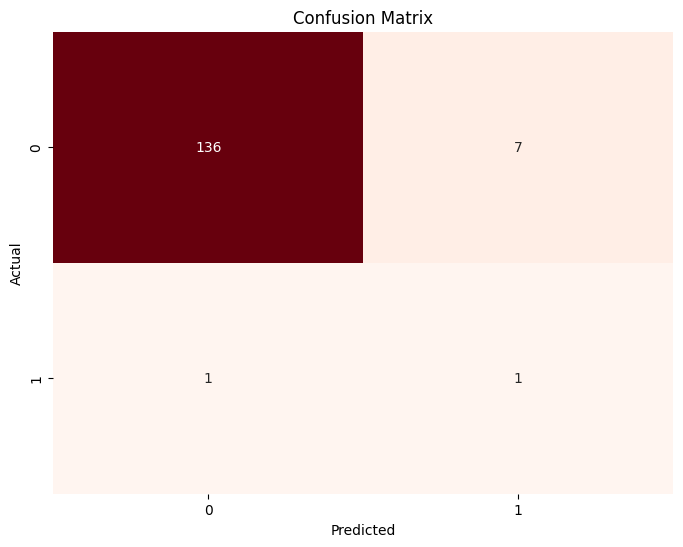

In [8]:
# prediksi data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

#lakukan prediksi
y_pred = knn.predict(X_test)

#hitung confusion metrics
cm = confusion_matrix(y_test, y_pred)

#visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['0','1'], yticklabels=['0','1'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

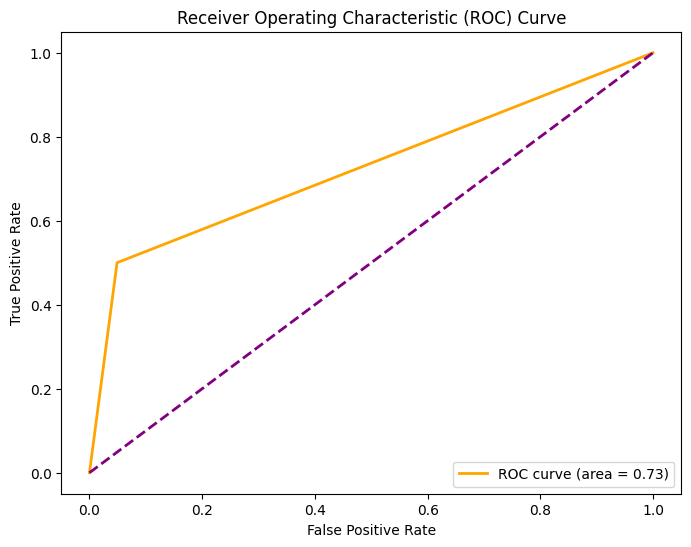

In [9]:
#visualisasi data perdiksi
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

#kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
#evaluasi model
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:

[[136   7]
 [  1   1]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       143
           1       0.12      0.50      0.20         2

    accuracy                           0.94       145
   macro avg       0.56      0.73      0.59       145
weighted avg       0.98      0.94      0.96       145

